# **London Housing Analysis - Visualisations**

## Objectives

* Fetch data from clean data file to create visualisations using Matplotlib, Seaborn and Plotly
* Derive conclusions based off of visualisations
* Challenge hypotheses using conclusions and visualisations

## Inputs

* Data from Clean Data CSV stored under the Clean Data folder

## Outputs

* Visualisations and conclusions from the data

 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\naqas\\OneDrive\\Documents\\Coding\\CI_Projects\\london-housing-analysis-project\\london_housing_analysis_project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\naqas\\OneDrive\\Documents\\Coding\\CI_Projects\\london-housing-analysis-project\\london_housing_analysis_project'

# Import Packages required for visualisations

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

---

# Import Clean Data set

Now that the data has been cleaned, it needs to be imported for use in the visualisations. A new dataframe will be created to store this clean data.

In [5]:
clean_london_housing_data_df = pd.read_csv("dataFiles/CleanData/monthly_data_clean_version.csv")
clean_london_housing_data_df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year
0,2001-01-01,barking and dagenham,82343,E09000002,215,1771,1,2001
1,2001-01-02,barking and dagenham,83266,E09000002,238,1600,1,2001
2,2001-01-03,barking and dagenham,84058,E09000002,274,1759,1,2001
3,2001-01-04,barking and dagenham,83965,E09000002,241,1643,1,2001
4,2001-01-05,barking and dagenham,85124,E09000002,283,1809,1,2001
...,...,...,...,...,...,...,...,...
7259,2019-01-07,westminster,957897,E09000033,168,6991,1,2019
7260,2019-01-08,westminster,914870,E09000033,156,7069,1,2019
7261,2019-01-09,westminster,925955,E09000033,169,6384,1,2019
7262,2019-01-10,westminster,927864,E09000033,168,7208,1,2019


---

# _Matplotlib_

Using the clean data, a variable must be created to create an sum of all crimes per year for all areas. This will allow us to asses the total crimes occurring per year in London over the 2001-2019 period.

In [6]:
crimes_per_year = clean_london_housing_data_df.groupby(["area","year"])["no_of_crimes"].sum().reset_index()

Now, a bar chart must be created to visualise the data. An "edgecolor" was defined as "none" as whitelines were appearing across the bars. Presumably, this occurred because the boroughs were being shown separately in one bar, however, it is preferred to see them all as one bar and with no separations as it is an analysis from across the city as a whole. Also, the years were being displayed as the follows: "2001.0" even though they are stored as integers. After some research it was deemed better to convert the values to string to make the graph cleaner and easier to visualise.

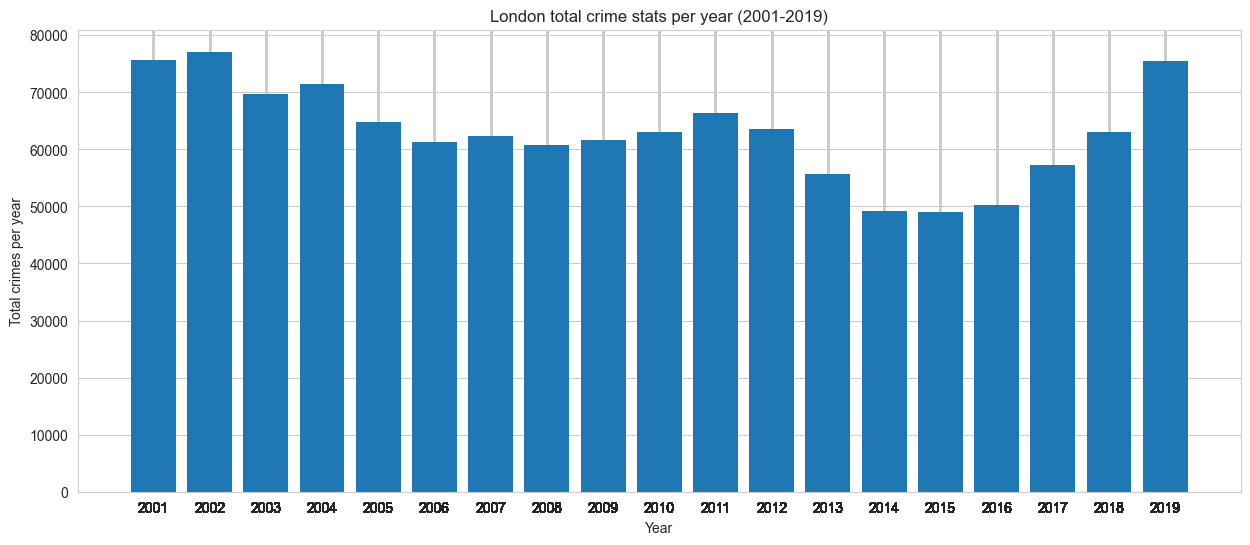

In [21]:
plt.figure(figsize=(15,6))
plt.bar(crimes_per_year["year"], crimes_per_year["no_of_crimes"], edgecolor = "none")
plt.xticks(
    clean_london_housing_data_df["year"],
    clean_london_housing_data_df["year"].astype(str)
)

plt.xlabel("Year")
plt.ylabel("Total crimes per year")
plt.title("London total crime stats per year (2001-2019)")
plt.show()

Following this, a variable must be created for the sum of all houses sold per year from all areas.This will allow us to asses the total houses sold per year in all the London boroughs over the 2001-2019 period.

In [34]:
houses_sold_per_year = clean_london_housing_data_df.groupby(["area","year"])["houses_sold"].sum().reset_index()

Now a bar chart has to be created to visualise this data. The cosmetic changes made to the previous graph have been continued here.

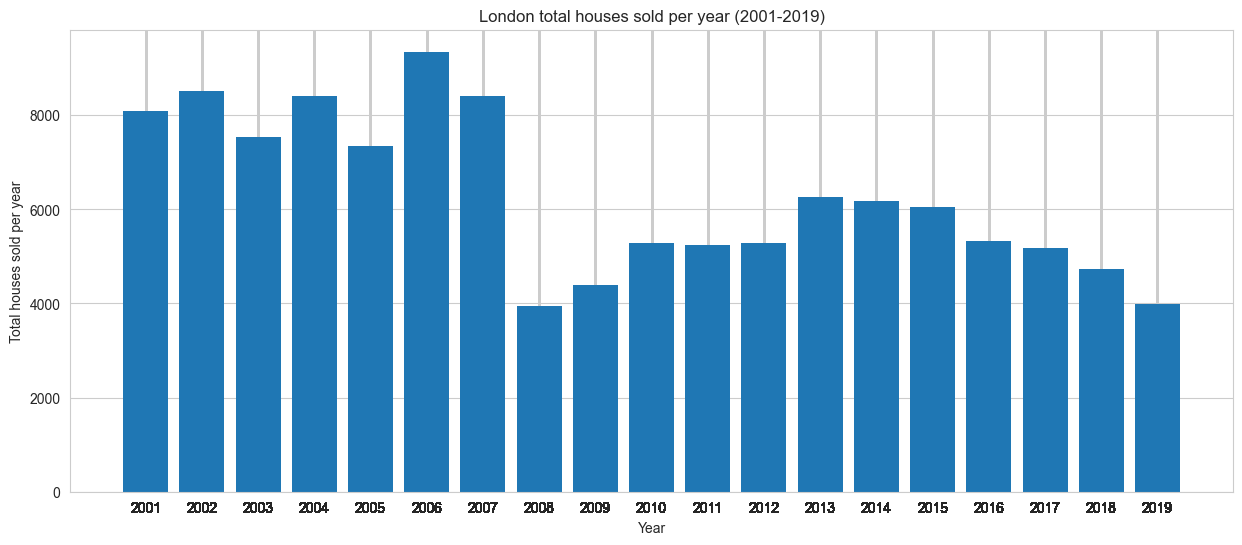

In [35]:
plt.figure(figsize=(15,6))
plt.bar(houses_sold_per_year["year"], houses_sold_per_year["houses_sold"], edgecolor = "none")
plt.xticks(
    clean_london_housing_data_df["year"],
    clean_london_housing_data_df["year"].astype(str)
)

plt.xlabel("Year")
plt.ylabel("Total houses sold per year")
plt.title("London total houses sold per year (2001-2019)")
plt.show()

When both bar charts are analysed initially, it does not seem like there is a trend across all of London with crimes and houses sold. However, when analysed further it can be seen that when there is an increase in crime, then concurrently there is a decrease in houses sold in the following year. When 2002 has an increase in crime from 2001, then the following year of 2003 sees a drop in houses sold. Then when there is a decrease in crime from 2002 to 2003 then the following year there is an increase in houses sold. This shows that there is a correlation between the crime rate and the amount of houses that are sold in London. 

---

# _Seaborn_

A graph is required to show the crime rate and rate of houses sold in each area to compare the trends over the period between 2001-2019. A facet grid is used as it creates multiple subplots within a grid layout. This makes it clear to compare all the boroughs together.

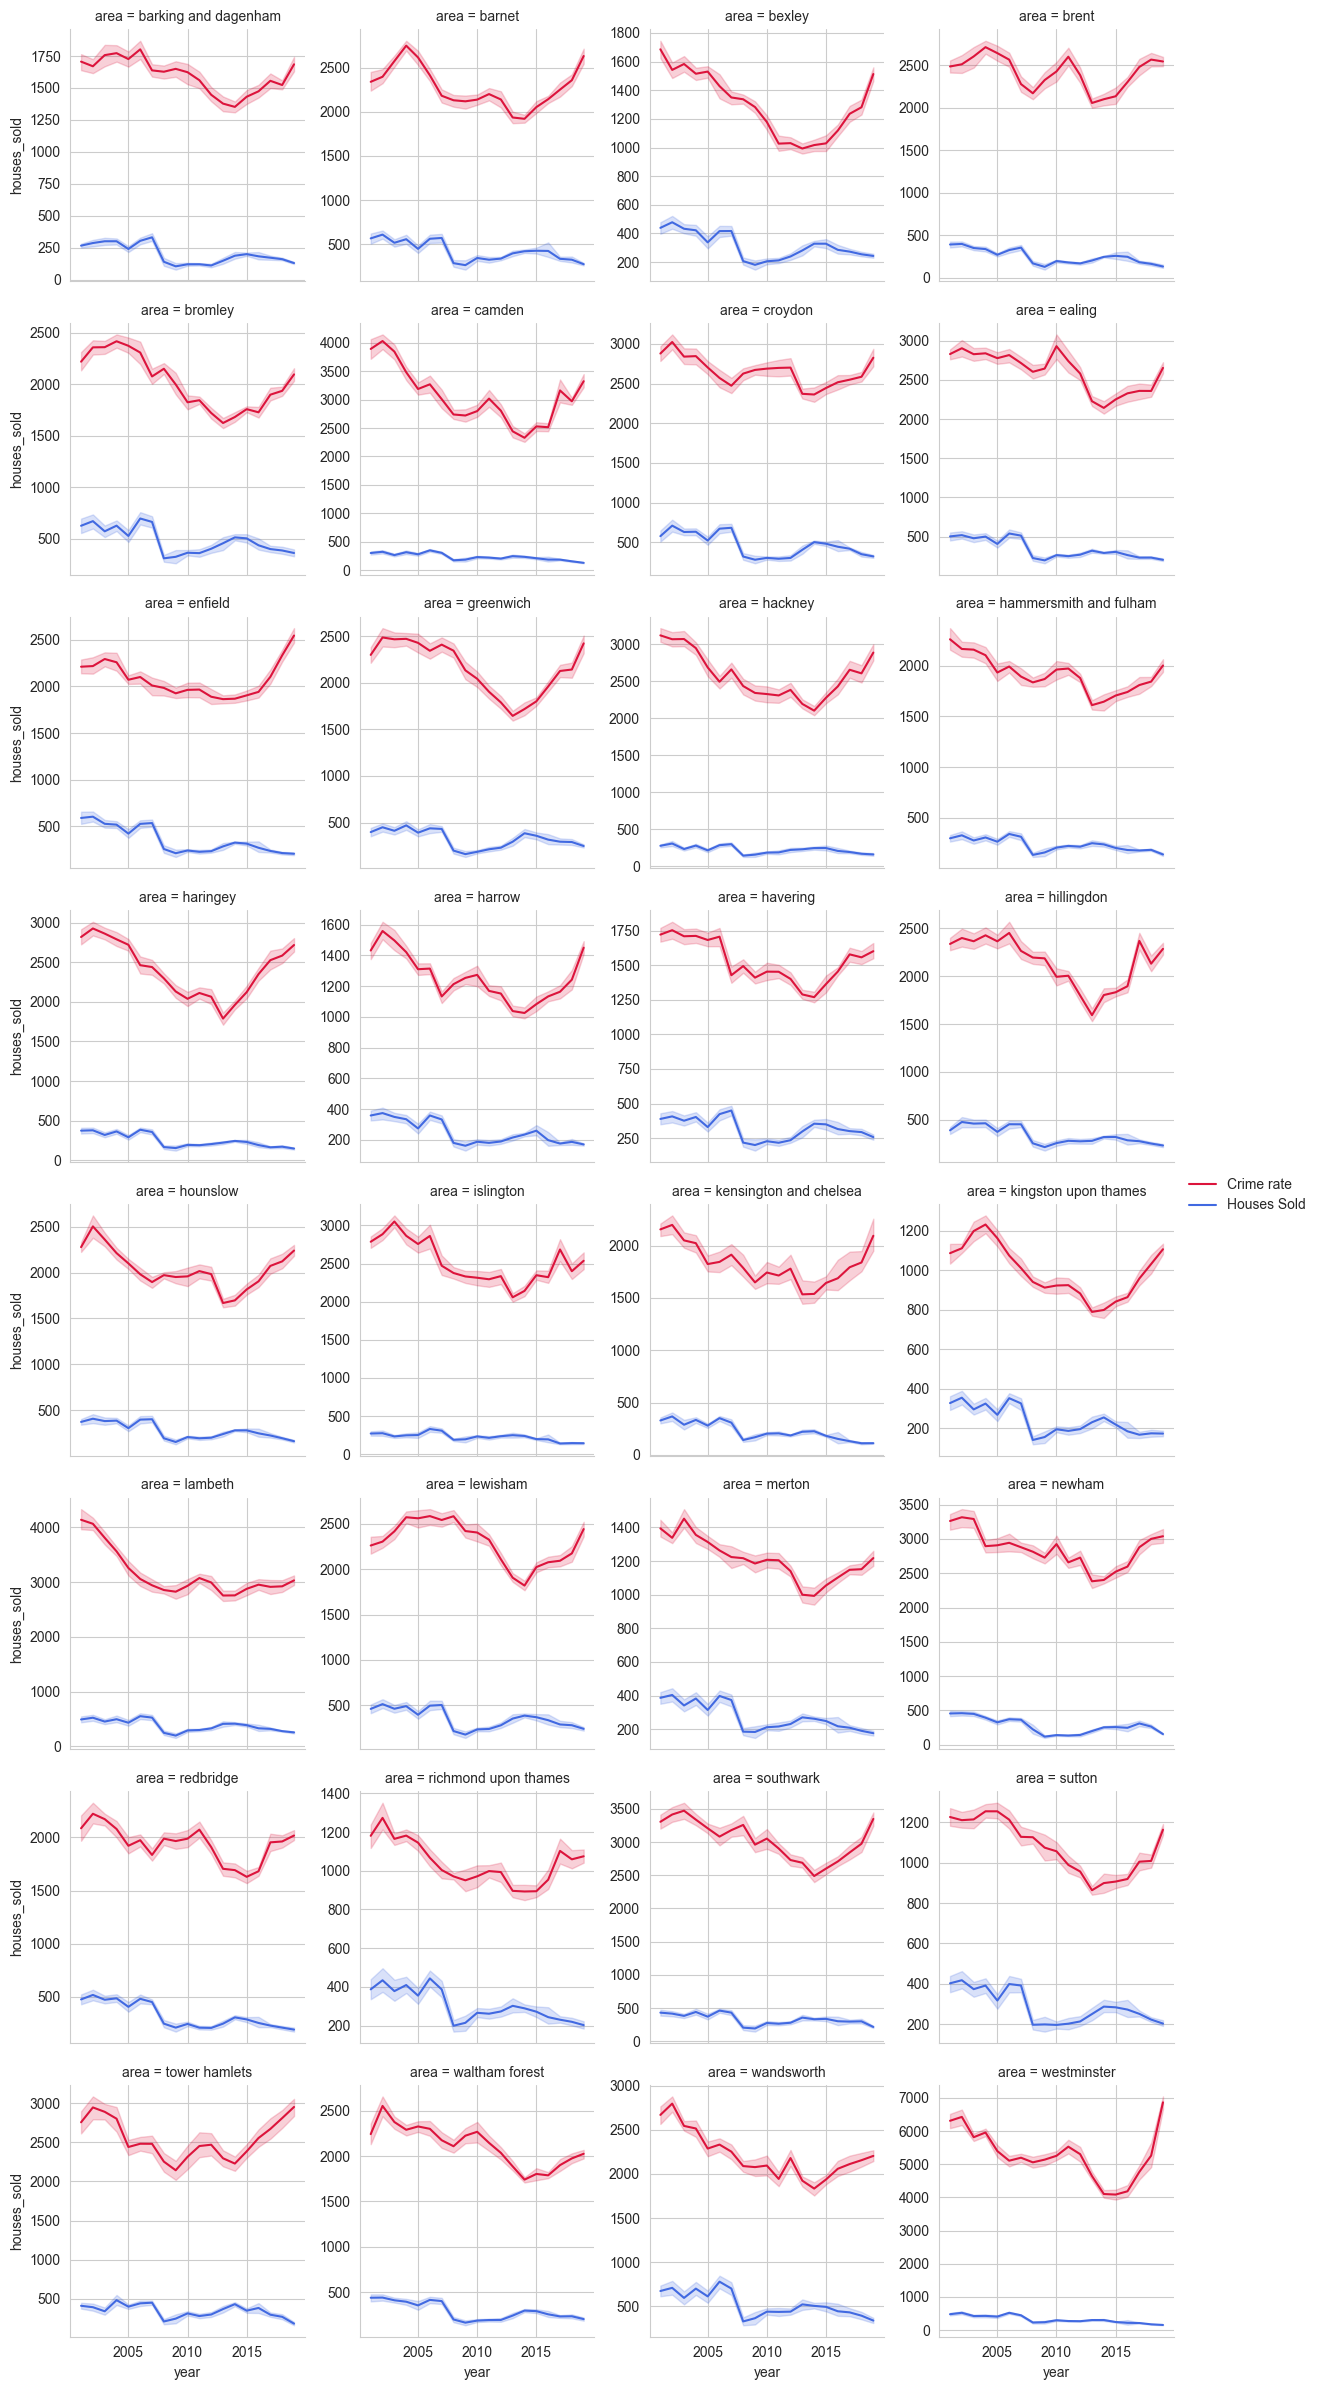

In [28]:
borough_facetgrid = sns.FacetGrid(clean_london_housing_data_df, col="area", col_wrap=4, height=3, sharey=False)

borough_facetgrid.map(sns.lineplot, "year", "no_of_crimes",color= "crimson", label="Crime rate")
borough_facetgrid.map(sns.lineplot, "year", "houses_sold", color= "royalblue", label="Houses Sold")

borough_facetgrid.add_legend()

Although the y axis scales are not the same across all the subplots, it can still be seen that there is a trend where there is an increase in crime, there is a decrease in houses sold and vice versa.

To create a heatmap for both houses sold, average house price and number of crimes, first it is required to create pivot tables for each characteristic before creating the heatmap. Below are the pivot tables for each:

In [43]:
crime_pivot = clean_london_housing_data_df.pivot_table( index= "area", columns = "year", values = "no_of_crimes", aggfunc= "sum")

In [37]:
houses_sold_pivot = clean_london_housing_data_df.pivot_table( index= "area", columns = "year", values = "houses_sold", aggfunc= "mean")

In [38]:
house_price_average_pivot = clean_london_housing_data_df.pivot_table(index = "area", columns = "year", values="average_price", aggfunc="mean" )

Now the heatmaps can be formed from all the above pivot tables.

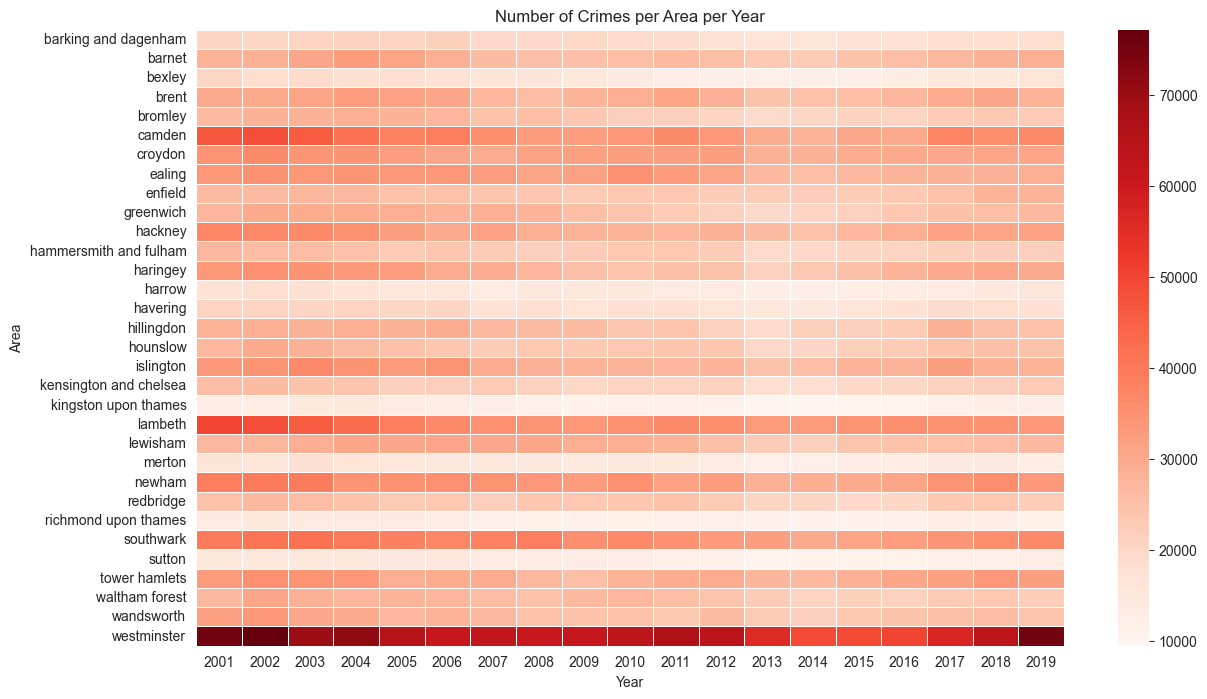

In [46]:
plt.figure(figsize=(14,8))

sns.heatmap(crime_pivot,cmap= "Reds", linewidths= 0.5)

plt.title("Number of Crimes per Area per Year")
plt.xlabel("Year")
plt.ylabel("Area")
plt.show()

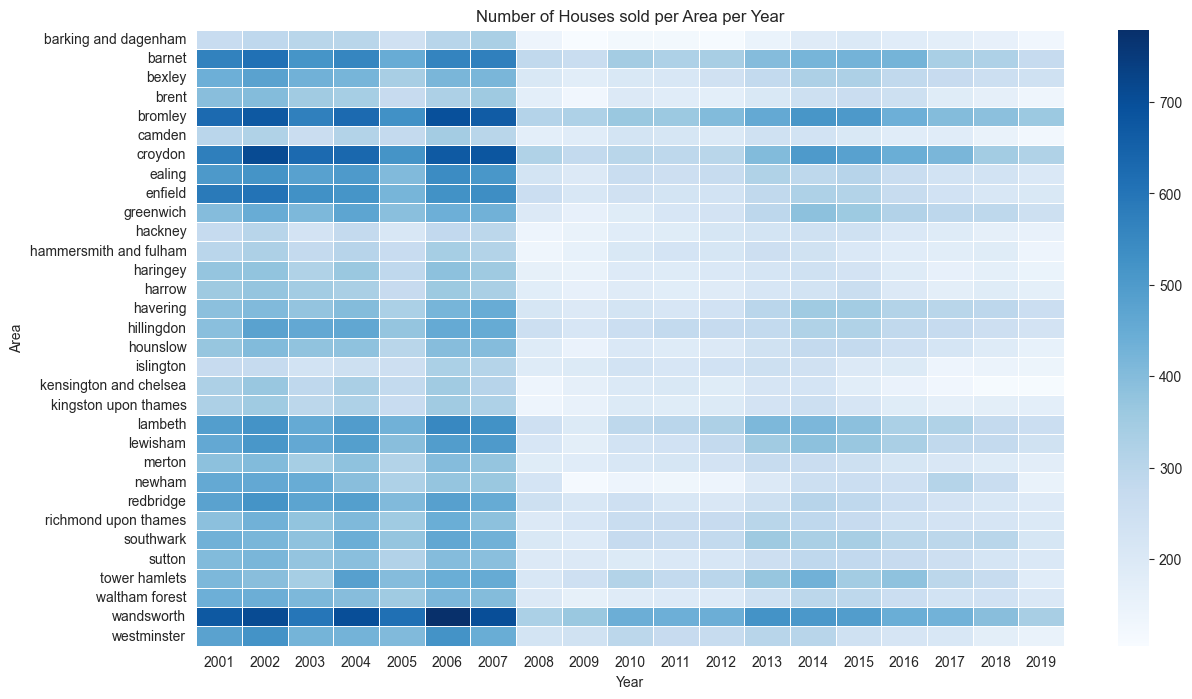

In [41]:
plt.figure(figsize=(14,8))

sns.heatmap(houses_sold_pivot, cmap= "Blues", linewidths= 0.5)

plt.title("Number of Houses sold per Area per Year")
plt.xlabel("Year")
plt.ylabel("Area")
plt.show()

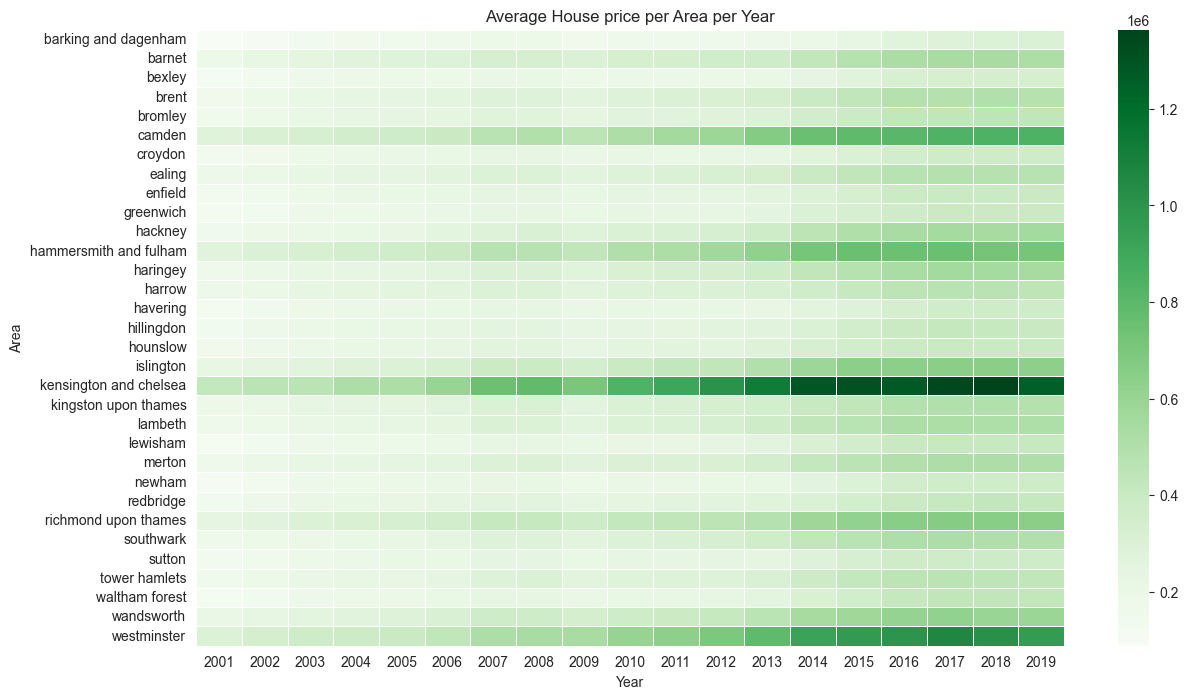

In [42]:
plt.figure(figsize=(14,8))

sns.heatmap(house_price_average_pivot, cmap= "Greens", linewidths= 0.5)

plt.title("Average House price per Area per Year")
plt.xlabel("Year")
plt.ylabel("Area")
plt.show()

---

# Conclusions

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.